# Minneapolis Police Stops and Police Violence

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

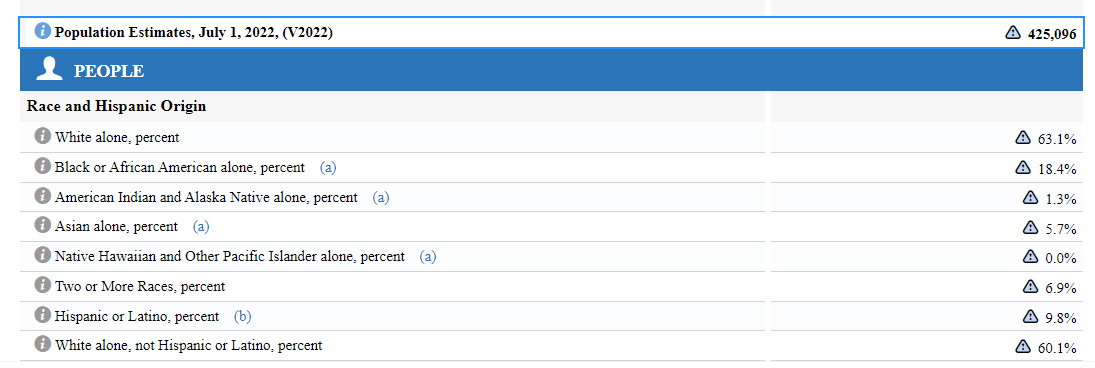

## Stops

In [9]:
police_stop_filepath = "../data/police_stop_data.csv"
police_stop_df = pd.read_csv(police_stop_filepath, low_memory=False)
police_stop_df.head()

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
0,1,16-395258,2016/10/31 22:40:47+00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.979570,-93.272570,-1.038306e+07,5.618306e+06,1.0,Downtown West,2017/08/08 10:25:31+00
1,2,16-395296,2016/10/31 23:06:36+00,NaN,Traffic Law Enforcement (P),TAG-Tagged,NaN,NO,NO,Unknown,Black,Male,44.962689,-93.275921,-1.038343e+07,5.615650e+06,5.0,Steven's Square - Loring Heights,2017/08/08 10:26:13+00
2,3,16-395326,2016/10/31 23:20:54+00,NaN,Attempt Pick-Up (P),RFD-Refused,NaN,NO,NO,Unknown,Unknown,Unknown,45.024836,-93.288069,-1.038478e+07,5.625432e+06,4.0,Webber - Camden,2017/08/08 10:24:35+00
3,4,16-395328,2016/10/31 23:23:20+00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.946560,-93.247410,-1.038025e+07,5.613112e+06,3.0,Corcoran,2017/08/08 10:25:31+00
4,5,16-395333,2016/10/31 23:26:05+00,NaN,Suspicious Vehicle (P),GOA-Gone on Arrival,NaN,NO,NO,Other,Unknown,Male,44.906170,-93.255010,-1.038110e+07,5.606762e+06,3.0,Hale,2017/08/08 10:25:03+00


In [10]:
police_stop_df["responseDate"].str.split("/", n=1, expand=True).iloc[:, 0]

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
210248    2023
210249    2023
210250    2023
210251    2023
210252    2023
Name: 0, Length: 210253, dtype: object

In [43]:
police_stop_df = (
    police_stop_df.assign(
        responseDate=lambda x: pd.to_datetime(x["responseDate"]),
        year=lambda x: x["responseDate"].dt.year
    )
)
police_stop_df.head()

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate,year
0,1,16-395258,2016-10-31 22:40:47+00:00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.979570,-93.272570,-1.038306e+07,5.618306e+06,1.0,Downtown West,2017/08/08 10:25:31+00,2016
1,2,16-395296,2016-10-31 23:06:36+00:00,NaN,Traffic Law Enforcement (P),TAG-Tagged,NaN,NO,NO,Unknown,Black,Male,44.962689,-93.275921,-1.038343e+07,5.615650e+06,5.0,Steven's Square - Loring Heights,2017/08/08 10:26:13+00,2016
2,3,16-395326,2016-10-31 23:20:54+00:00,NaN,Attempt Pick-Up (P),RFD-Refused,NaN,NO,NO,Unknown,Unknown,Unknown,45.024836,-93.288069,-1.038478e+07,5.625432e+06,4.0,Webber - Camden,2017/08/08 10:24:35+00,2016
3,4,16-395328,2016-10-31 23:23:20+00:00,NaN,Suspicious Person (P),BKG-Booking,NaN,YES,NO,Black,Black,Male,44.946560,-93.247410,-1.038025e+07,5.613112e+06,3.0,Corcoran,2017/08/08 10:25:31+00,2016
4,5,16-395333,2016-10-31 23:26:05+00:00,NaN,Suspicious Vehicle (P),GOA-Gone on Arrival,NaN,NO,NO,Other,Unknown,Male,44.906170,-93.255010,-1.038110e+07,5.606762e+06,3.0,Hale,2017/08/08 10:25:03+00,2016


<AxesSubplot: xlabel='count', ylabel='problem'>

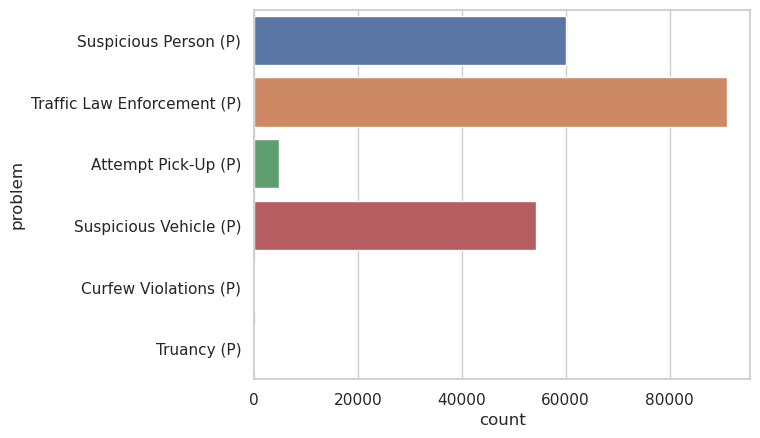

In [12]:
sns.countplot(
    data=police_stop_df,
    y="problem"
)

<AxesSubplot: xlabel='count', ylabel='race'>

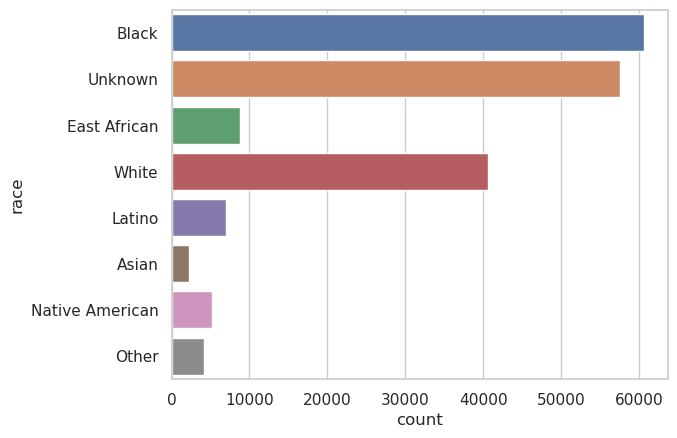

In [13]:
sns.countplot(
    data=police_stop_df,
    y="race"
)

<AxesSubplot: xlabel='count', ylabel='problem'>

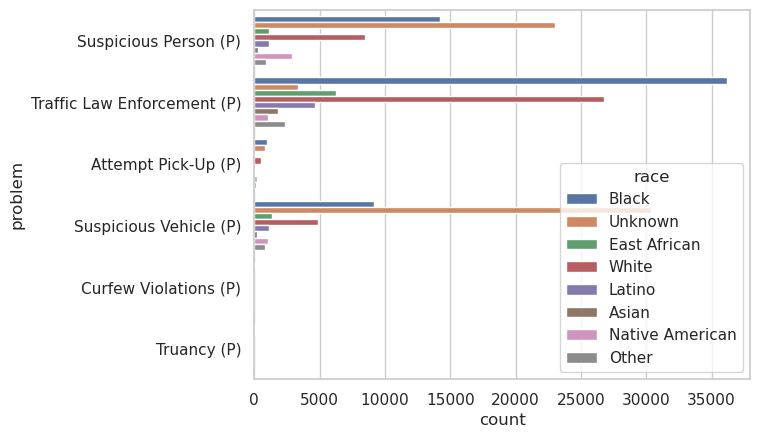

In [35]:
sns.countplot(
    data=police_stop_df,
    y="problem",
    hue="race",
)

<AxesSubplot: xlabel='problem', ylabel='race'>

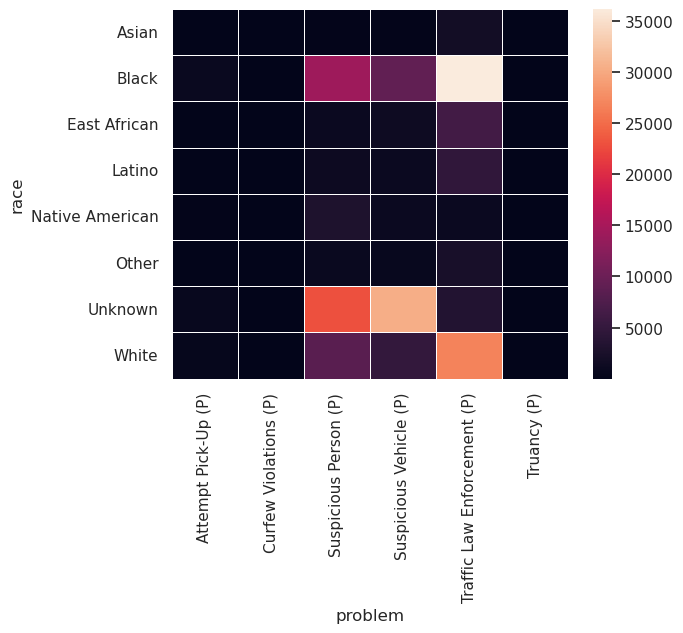

In [15]:
sns.heatmap(
    police_stop_df.pivot_table(index="race", columns="problem", values="OBJECTID", aggfunc="count"),
    linewidth=.5
)

<AxesSubplot: xlabel='count', ylabel='gender'>

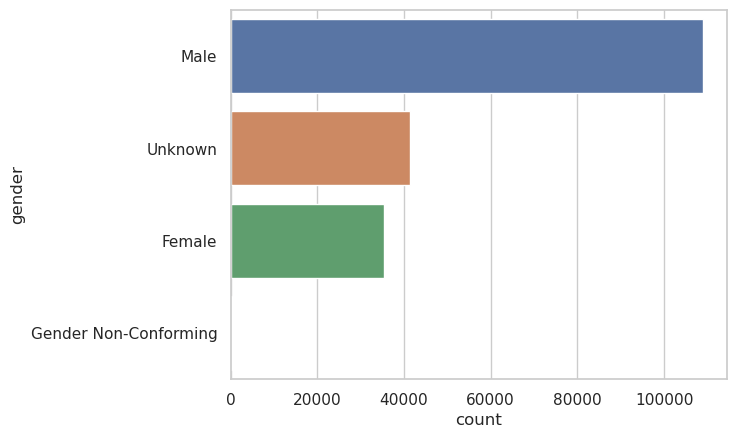

In [37]:
sns.countplot(
    data=police_stop_df,
    y="gender"
)

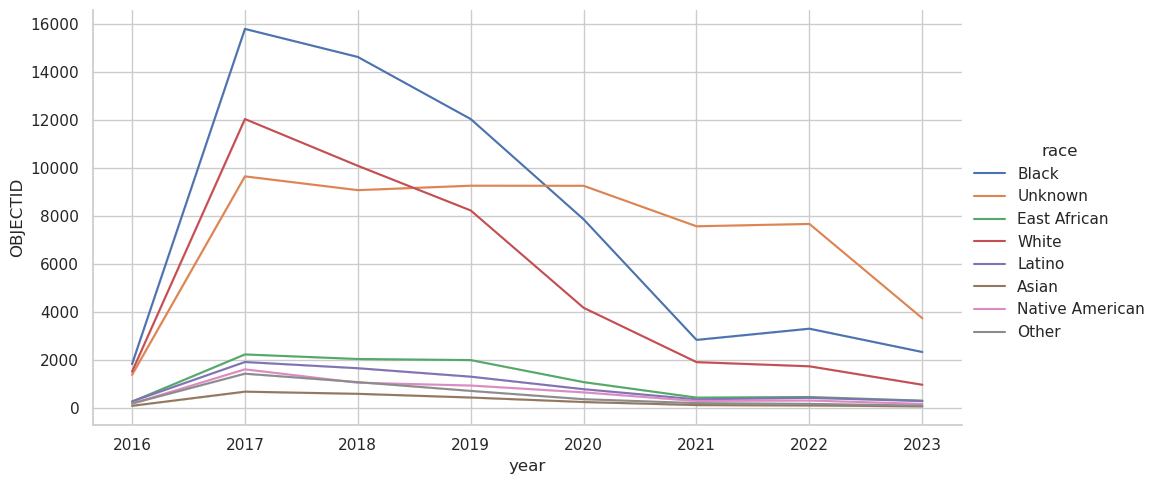

In [23]:
sns.relplot(
    data=police_stop_df,
    x="year",
    y="OBJECTID",
    hue="race",
    estimator="size",
    kind="line",
    aspect=2
)


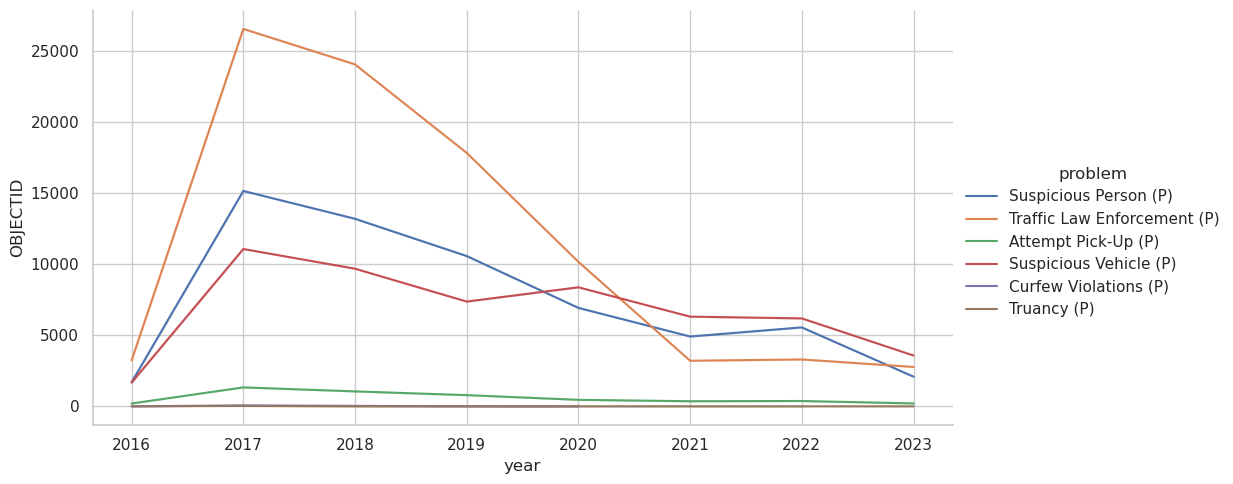

In [38]:
sns.relplot(
    data=police_stop_df,
    x="year",
    y="OBJECTID",
    hue="problem",
    estimator="size",
    kind="line",
    aspect=2
)


## Force

In [39]:
police_force_filepath = "../data/police_use_of_force.csv"
police_force_df = pd.read_csv(police_force_filepath, low_memory=False)
police_force_df.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
0,-93.286438,45.010118,49876125,08-018973,2008/01/19 22:53:35+00,Suspicious Vehicle,No,RECVEH,No,1,...,322402,80434.0,13679,18761,45.010118,-93.286438,-1.038460e+07,5.623115e+06,2023/06/13 08:20:27+00,1
1,-93.283381,45.005359,49876126,08-019283,2008/01/20 05:40:29+00,Domestic Abuse-In Progress,Yes,OBSTRU,No,2,...,322402,80434.0,13679,20349,45.005359,-93.283381,-1.038426e+07,5.622365e+06,2023/06/13 08:20:27+00,2
2,-93.281874,44.914179,49876127,08-024311,2008/01/25 20:34:33+00,Fight,No,FLEEFT,No,1,...,322402,55689.0,1566,12396,44.914179,-93.281874,-1.038409e+07,5.608021e+06,2023/06/13 08:20:27+00,3
3,-93.284931,45.005356,49876128,08-051094,2008/02/22 21:20:33+00,Suspicious Person,No,RECVEH,No,1,...,322402,80434.0,13679,20351,45.005356,-93.284931,-1.038443e+07,5.622365e+06,2023/06/13 08:20:27+00,4
4,-93.265106,44.963324,49876129,08-054881,2008/02/26 16:23:12+00,Suspicious Person,No,OBSTRU,No,2,...,322402,84018.0,10316,20569,44.963324,-93.265106,-1.038222e+07,5.615749e+06,2023/06/13 08:20:27+00,5


In [41]:
police_force_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X,39182.0,NaN,NaN,NaN,-89.462653,18.465417,-93.329109,-93.289353,-93.273116,-93.25755,0.0
Y,39182.0,NaN,NaN,NaN,43.13996,8.904279,0.0,44.955913,44.979156,44.995491,45.051245
PoliceUseOfForceID,39182.0,NaN,NaN,NaN,49895715.5,11311.01346,49876125.0,49885920.25,49895715.5,49905510.75,49915306.0
CaseNumber,39182,17671,21-121360,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ResponseDate,39171,16287,2021/01/01 00:00:00+00,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Problem,37498,144,Suspicious Person,5530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is911Call,37779,2,No,19465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimaryOffense,37787,223,OBSTRU,5329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubjectInjury,20900,2,No,10776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ForceReportNumber,39182.0,NaN,NaN,NaN,1.697361,1.621753,0.0,1.0,1.0,2.0,49.0
